# **Predicting tweet sentiment**

Dataset from https://www.kaggle.com/datasets/bhavikjikadara/tweets-dataset

**Context**

This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the Twitter API. The tweets have been annotated (0 = negative, 4 = positive) and can be used to detect sentiment.

**Content**

It contains the following 6 fields:

* target: the polarity of the tweet (0 = negative and 4 = positive)
* ids: The id of the tweet ( 2087)
* date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
* flag: The query (lyx). If there is no query, then this value is NO_QUERY.
* user: the user that tweeted.
* text: the text of the tweet.

## **1. Exploratory Data Analysis** 

In [78]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%pip install contractions, wordcloud, tensorflow

# text processing libraries
import re
import contractions

from collections import Counter
# import string
import nltk
# import warnings
# %matplotlib inline
# warnings.filterwarnings("ignore")
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


ERROR: Invalid requirement: 'contractions,'
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\macie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\macie\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Note: you may need to restart the kernel to use updated packages.


Pandas and Numpy have been used for data manipulation and numerical calculations

Matplotlib and Seaborn have been used for data visualizations

In [2]:
# import data   
tweets = pd.read_csv("..//data//tweets.csv", encoding="latin-1")

In [3]:
tweets.head()

,Target,ID,Date,flag,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


## **2. Splitting dataset into training, valid and testing parts**

In [4]:
x_train_valid, x_test, y_train_valid, y_test = train_test_split(
    tweets.drop(columns=['Target']), # X
    tweets['Target'], # y
    test_size=0.3, random_state=42)

In [5]:
x_train_valid.shape, y_train_valid.shape, x_test.shape, y_test.shape 

((734002, 5), (734002,), (314573, 5), (314573,))

In [6]:
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_valid, # X
    y_train_valid, # y
    test_size=0.3, random_state=42)

In [7]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((513801, 5), (513801,), (220201, 5), (220201,))

In [8]:
# saving to files
# x_train.to_csv("..//data//x_train.csv", index=False)
# y_train.to_csv("..//data//y_train.csv", index=False)
# x_valid.to_csv("..//data//x_valid.csv", index=False)
# y_valid.to_csv("..//data//y_valid.csv", index=False)
# x_test.to_csv("..//data//x_test.csv", index=False)
# y_test.to_csv("..//data//y_test.csv", index=False)

## EDA


In [9]:
# check the shape of the dataframe
# df = x_train
# df['Target'] = y_train
df = x_valid
df['Target'] = y_valid
print("Shape of the dataframe:", df.shape)

Shape of the dataframe: (220201, 6)


In [10]:
# display the first few rows of the dataframe
df.head()

,ID,Date,flag,User,Text,Target
240689,1980936366,Sun May 31 08:02:09 PDT 2009,NO_QUERY,JustMaddie,Tierd and it's school tomorrow Last week atle...,0
413003,2060489943,Sat Jun 06 19:00:12 PDT 2009,NO_QUERY,tyla_da_queen,twitter gets boring n boring everyday!!!no sta...,0
950284,1823968497,Sat May 16 23:35:04 PDT 2009,NO_QUERY,ileftmycookie,"I'm watching Guy Ripley, right now......haha.....",4
672298,2247129196,Fri Jun 19 18:37:58 PDT 2009,NO_QUERY,geekonomics,@mhisham that's the way indoor stadium toilets...,0
852721,1573026482,Mon Apr 20 23:26:00 PDT 2009,NO_QUERY,NovaWildstar,@hannahpoulton it must be all that bike riding!,4


In [11]:
# display the last few rows of the dataframe
df.tail()

,ID,Date,flag,User,Text,Target
55759,1685191660,Sat May 02 23:23:47 PDT 2009,NO_QUERY,pnwfitness,@LisaKLong Wantd 2b comedian when lil boy. I m...,0
175608,1964891086,Fri May 29 14:58:49 PDT 2009,NO_QUERY,Brandonnnnnnnn,Omg I can't believe jay leno is going off the ...,0
661283,2243073656,Fri Jun 19 12:59:35 PDT 2009,NO_QUERY,emmalouisex3,@Nickjonas: i dont know! my days are all messe...,0
43369,1676483427,Fri May 01 22:10:50 PDT 2009,NO_QUERY,DonniesDiva,So I am guessin @donniewahlberg meant midnight...,0
401275,2057629187,Sat Jun 06 13:21:43 PDT 2009,NO_QUERY,lovesmiles,"shit! fuckin fever, fuckin body ..think im gon...",0


In [12]:
# display information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220201 entries, 240689 to 401275
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      220201 non-null  int64 
 1   Date    220201 non-null  object
 2   flag    220201 non-null  object
 3   User    220201 non-null  object
 4   Text    220201 non-null  object
 5   Target  220201 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 11.8+ MB


In [13]:
# check for duplication
df.nunique()

ID        220172
Date      194930
flag           1
User      162707
Text      218810
Target         2
dtype: int64

In [14]:
# check for missing values
df.isnull().sum()

ID        0
Date      0
flag      0
User      0
Text      0
Target    0
dtype: int64

In [15]:
# summary statistics of numerical columns
df.describe()

,ID,Target
count,2.202010e+05,220201.000000
mean,1.975621e+09,0.949115
std,2.302542e+08,1.701662
min,1.467811e+09,0.000000
25%,1.824298e+09,0.000000
50%,1.990733e+09,0.000000
75%,2.198698e+09,0.000000
max,2.329203e+09,4.000000


**Data reduction**

Some columns or variables can be dropped if they do not add value to our analysis

In our dataset, columns ID, Date, flag, User don’t have any predictive power to predict the dependent variable

In [16]:
data = df.drop(['ID', 'Date', 'flag', 'User'], axis = 'columns')
data

,Text,Target
240689,Tierd and it's school tomorrow Last week atle...,0
413003,twitter gets boring n boring everyday!!!no sta...,0
950284,"I'm watching Guy Ripley, right now......haha.....",4
672298,@mhisham that's the way indoor stadium toilets...,0
852721,@hannahpoulton it must be all that bike riding!,4
...,...,...
55759,@LisaKLong Wantd 2b comedian when lil boy. I m...,0
175608,Omg I can't believe jay leno is going off the ...,0
661283,@Nickjonas: i dont know! my days are all messe...,0
43369,So I am guessin @donniewahlberg meant midnight...,0


**Data cleaning**

Some names of the variables are not relevant and not easy to understand

Some data may have data entry errors, and some variables may need data type conversion. We need to fix this issue in the data

In [17]:
# adjusting target values
data['Target'] = data['Target'].replace(4, 1)
data

,Text,Target
240689,Tierd and it's school tomorrow Last week atle...,0
413003,twitter gets boring n boring everyday!!!no sta...,0
950284,"I'm watching Guy Ripley, right now......haha.....",1
672298,@mhisham that's the way indoor stadium toilets...,0
852721,@hannahpoulton it must be all that bike riding!,1
...,...,...
55759,@LisaKLong Wantd 2b comedian when lil boy. I m...,0
175608,Omg I can't believe jay leno is going off the ...,0
661283,@Nickjonas: i dont know! my days are all messe...,0
43369,So I am guessin @donniewahlberg meant midnight...,0


In [18]:
# removing unnecessary user tags
data['Text'] = data['Text'].replace(r"@\w+", "", regex=True)
data


,Text,Target
240689,Tierd and it's school tomorrow Last week atle...,0
413003,twitter gets boring n boring everyday!!!no sta...,0
950284,"I'm watching Guy Ripley, right now......haha.....",1
672298,that's the way indoor stadium toilets are,0
852721,it must be all that bike riding!,1
...,...,...
55759,Wantd 2b comedian when lil boy. I memrize com...,0
175608,Omg I can't believe jay leno is going off the ...,0
661283,: i dont know! my days are all messed up since...,0
43369,So I am guessin meant midnight Pacific time,0


In [19]:
# resolving contractions (and slang)
data['Text'] = data['Text'].apply(lambda x: contractions.fix(x))
data

,Text,Target
240689,Tierd and it is school tomorrow Last week atl...,0
413003,twitter gets boring n boring everyday!!!no sta...,0
950284,"I am watching Guy Ripley, right now......haha....",1
672298,that is the way indoor stadium toilets are,0
852721,it must be all that bike riding!,1
...,...,...
55759,Wantd 2b comedian when lil boy. I memrize com...,0
175608,Omg I cannot believe jay leno is going off the...,0
661283,: i do not know! my days are all messed up sin...,0
43369,So I am guessin meant midnight Pacific time,0


In [20]:
# removing punctuation marks
data['Text'] = data['Text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
data


,Text,Target
240689,Tierd and it is school tomorrow Last week atl...,0
413003,twitter gets boring n boring everydayno star w...,0
950284,I am watching Guy Ripley right nowhahahilarious,1
672298,that is the way indoor stadium toilets are,0
852721,it must be all that bike riding,1
...,...,...
55759,Wantd 2b comedian when lil boy I memrize comm...,0
175608,Omg I cannot believe jay leno is going off the...,0
661283,i do not know my days are all messed up since...,0
43369,So I am guessin meant midnight Pacific time,0


In [21]:
# lowercasing letters in the text
data['Text'] = data['Text'].str.lower()
data


,Text,Target
240689,tierd and it is school tomorrow last week atl...,0
413003,twitter gets boring n boring everydayno star w...,0
950284,i am watching guy ripley right nowhahahilarious,1
672298,that is the way indoor stadium toilets are,0
852721,it must be all that bike riding,1
...,...,...
55759,wantd 2b comedian when lil boy i memrize comm...,0
175608,omg i cannot believe jay leno is going off the...,0
661283,i do not know my days are all messed up since...,0
43369,so i am guessin meant midnight pacific time,0


**Visualization**

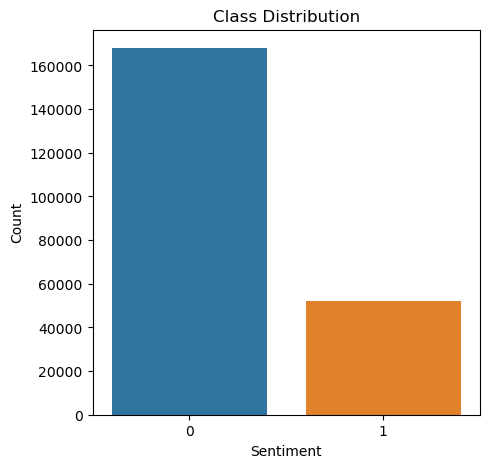

In [22]:
# visualize class distribution
plt.figure(figsize=(5, 5))
sns.countplot(x = 'Target' , data = data)
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [23]:
# checking the percentage of target 1
target_counts = data['Target'].value_counts()
percentage_target_1 = (target_counts[1] / target_counts.sum()) * 100
percentage_target_1

23.72786681259395

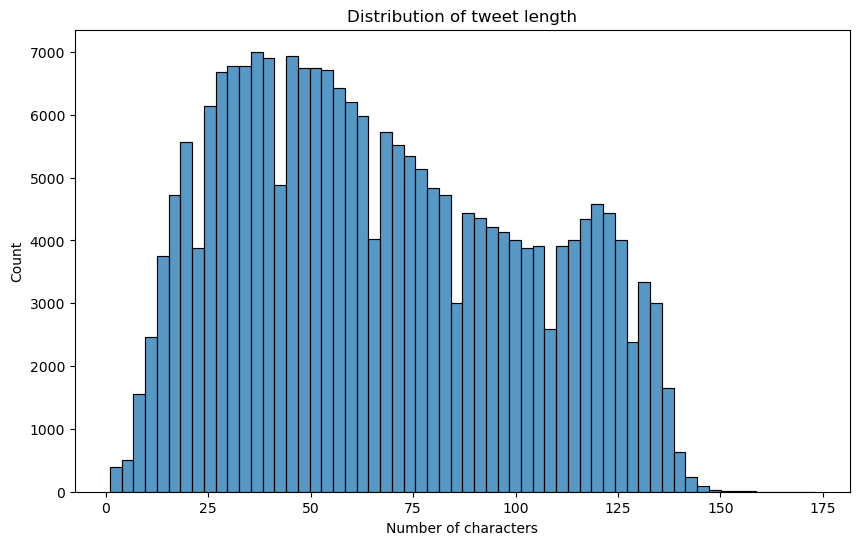

In [24]:
# explore tweet length
data['characters'] = data['Text'].apply(lambda x: len(x))

# visualize tweet length distribution
plt.figure(figsize = (10, 6))
sns.histplot(data['characters'], bins = 60)
plt.title('Distribution of tweet length')
plt.xlabel('Number of characters')
plt.ylabel('Count')
plt.show()

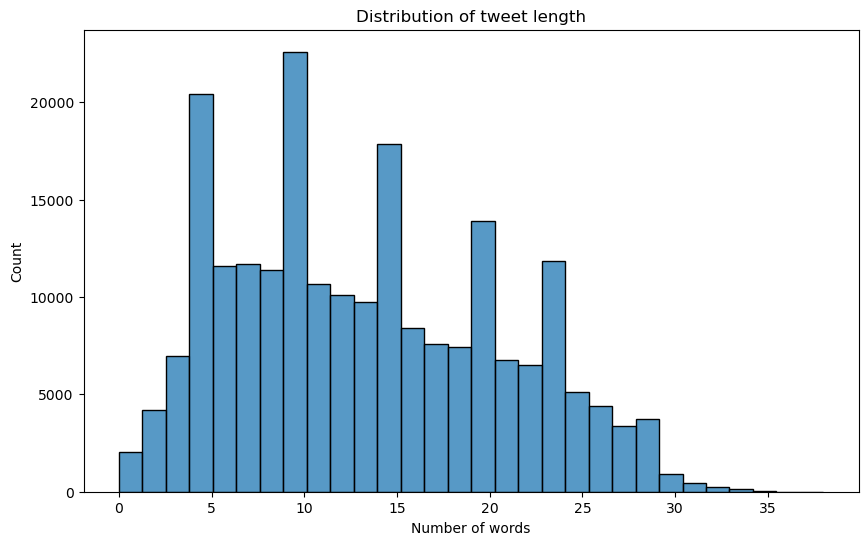

In [25]:
# explore tweet length
data['words'] = data['Text'].apply(lambda x: len(x.split()))

# visualize tweet length distribution
plt.figure(figsize = (10, 6))
sns.histplot(data['words'], bins = 30)
plt.title('Distribution of tweet length')
plt.xlabel('Number of words')
plt.ylabel('Count')
plt.show()

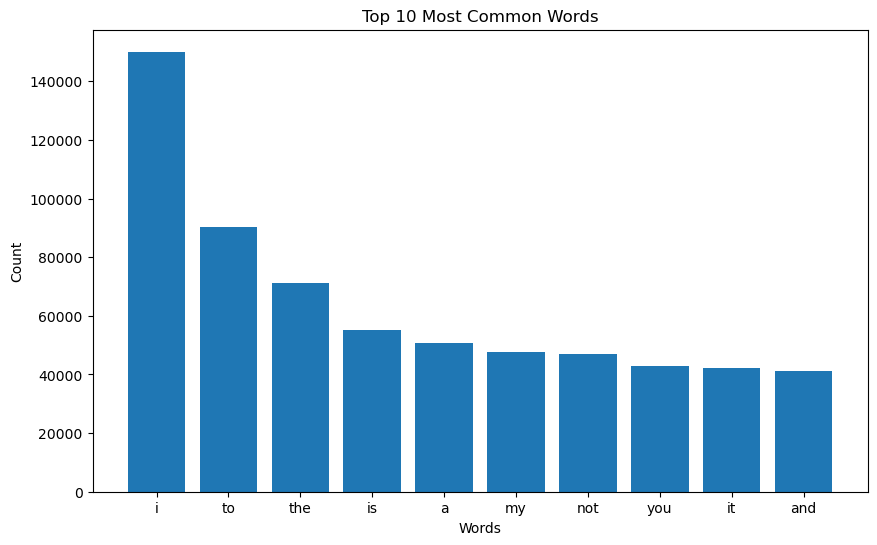

In [26]:

# combine all the text into a single string
all_text = ' '.join(data['Text'])

# split the text into individual words
words = all_text.split()

# count the frequency of each word
word_counts = Counter(words)

# get the top 10 most common words
top_10_words = word_counts.most_common(10)

# extract the words and their counts
top_10_words, top_10_counts = zip(*top_10_words)

# plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_words, top_10_counts)
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()


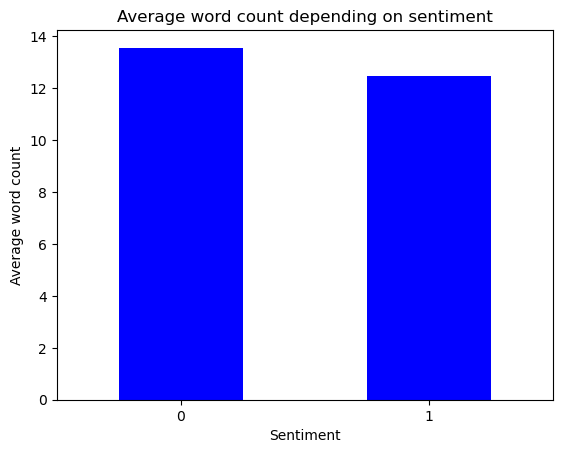

In [27]:
# average word count depending on sentiment

d = data.groupby("Target").words.agg("mean")

d.plot(kind = 'bar', color = 'blue')

plt.title('Average word count depending on sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average word count')
plt.xticks(rotation = 0)  
plt.show()

In [28]:
# is # in tweet?

data['has_hashtag'] = tweets['Text'].str.contains(r'#\w+')
data

,Text,Target,characters,words,has_hashtag
240689,tierd and it is school tomorrow last week atl...,0,51,9,False
413003,twitter gets boring n boring everydayno star w...,0,84,12,False
950284,i am watching guy ripley right nowhahahilarious,1,48,7,False
672298,that is the way indoor stadium toilets are,0,44,8,False
852721,it must be all that bike riding,1,33,7,False
...,...,...,...,...,...
55759,wantd 2b comedian when lil boy i memrize comm...,0,126,20,False
175608,omg i cannot believe jay leno is going off the...,0,51,11,False
661283,i do not know my days are all messed up since...,0,94,21,False
43369,so i am guessin meant midnight pacific time,0,45,8,False


In [29]:
# is hashtag present in negatives tweets?

data[data['Target'] == 0]['has_hashtag'].value_counts().apply(lambda x: x / len(data[data['Target'] == 0]) * 100)


False    98.136968
True      1.863032
Name: has_hashtag, dtype: float64

In [30]:
# is hashtag present in positives tweets?

data[data['Target'] == 1]['has_hashtag'].value_counts().apply(lambda x: x / len(data[data['Target'] == 1]) * 100)

False    97.536795
True      2.463205
Name: has_hashtag, dtype: float64

In [31]:
# is "not" in tweet?

data['has_not'] = data['Text'].str.contains('not')
data

,Text,Target,characters,words,has_hashtag,has_not
240689,tierd and it is school tomorrow last week atl...,0,51,9,False,False
413003,twitter gets boring n boring everydayno star w...,0,84,12,False,False
950284,i am watching guy ripley right nowhahahilarious,1,48,7,False,False
672298,that is the way indoor stadium toilets are,0,44,8,False,False
852721,it must be all that bike riding,1,33,7,False,False
...,...,...,...,...,...,...
55759,wantd 2b comedian when lil boy i memrize comm...,0,126,20,False,True
175608,omg i cannot believe jay leno is going off the...,0,51,11,False,True
661283,i do not know my days are all messed up since...,0,94,21,False,True
43369,so i am guessin meant midnight pacific time,0,45,8,False,False


In [32]:
# is "not" present in negatives tweets?

data[data['Target'] == 0]['has_not'].value_counts().apply(lambda x: x / len(data[data['Target'] == 0]) * 100)

False    70.515385
True     29.484615
Name: has_not, dtype: float64

In [33]:
# is "not" present in positives tweets?

data[data['Target'] == 1]['has_not'].value_counts().apply(lambda x: x / len(data[data['Target'] == 1]) * 100)

False    86.196865
True     13.803135
Name: has_not, dtype: float64

In [34]:
# extract hour from the Date column

data['Hour'] = pd.to_datetime(tweets['Date']).dt.hour
data


c:\Users\flang\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,Text,Target,characters,words,has_hashtag,has_not,Hour
240689,tierd and it is school tomorrow last week atl...,0,51,9,False,False,8
413003,twitter gets boring n boring everydayno star w...,0,84,12,False,False,19
950284,i am watching guy ripley right nowhahahilarious,1,48,7,False,False,23
672298,that is the way indoor stadium toilets are,0,44,8,False,False,18
852721,it must be all that bike riding,1,33,7,False,False,23
...,...,...,...,...,...,...,...
55759,wantd 2b comedian when lil boy i memrize comm...,0,126,20,False,True,23
175608,omg i cannot believe jay leno is going off the...,0,51,11,False,True,14
661283,i do not know my days are all messed up since...,0,94,21,False,True,12
43369,so i am guessin meant midnight pacific time,0,45,8,False,False,22


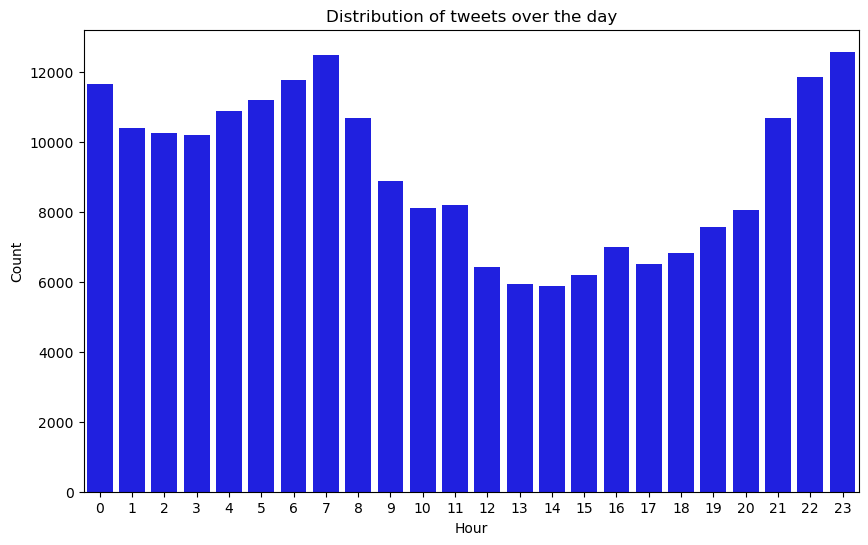

In [35]:
# visualize the distribution of tweets over the day

plt.figure(figsize=(10, 6))
sns.countplot(x = 'Hour', data = data, color = 'blue')
plt.title('Distribution of tweets over the day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()


<Figure size 1500x600 with 0 Axes>

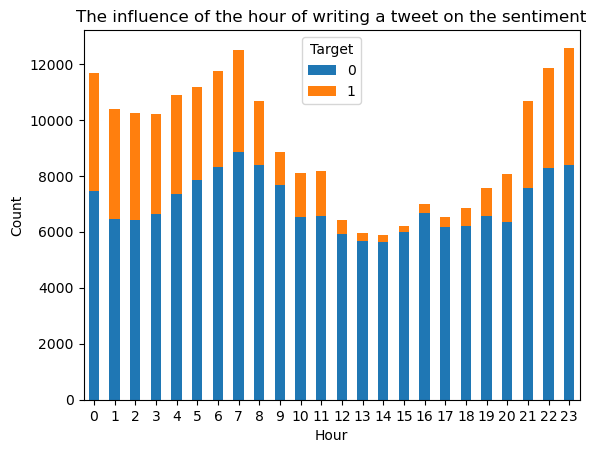

In [36]:
# visualize the the influence of the hour of writing a tweet on the Target variable
hourly_target_counts = data.groupby('Hour')['Target'].value_counts().unstack(fill_value=0)
plt.figure(figsize=(15, 6))
hourly_target_counts.plot(kind='bar', stacked=True)

plt.title('The influence of the hour of writing a tweet on the sentiment')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation = 0)  

plt.show()

In [37]:
# deleting words which have less characters than 3

data['clean_text'] = data["Text"].apply(lambda x: " ".join([w for w in x.split() if len(w)>=3]))
data

,Text,Target,characters,words,has_hashtag,has_not,Hour,clean_text
240689,tierd and it is school tomorrow last week atl...,0,51,9,False,False,8,tierd and school tomorrow last week atleast
413003,twitter gets boring n boring everydayno star w...,0,84,12,False,False,19,twitter gets boring boring everydayno star wan...
950284,i am watching guy ripley right nowhahahilarious,1,48,7,False,False,23,watching guy ripley right nowhahahilarious
672298,that is the way indoor stadium toilets are,0,44,8,False,False,18,that the way indoor stadium toilets are
852721,it must be all that bike riding,1,33,7,False,False,23,must all that bike riding
...,...,...,...,...,...,...,...,...
55759,wantd 2b comedian when lil boy i memrize comm...,0,126,20,False,True,23,wantd comedian when lil boy memrize commercial...
175608,omg i cannot believe jay leno is going off the...,0,51,11,False,True,14,omg cannot believe jay leno going off the air
661283,i do not know my days are all messed up since...,0,94,21,False,True,12,not know days are all messed since got out sch...
43369,so i am guessin meant midnight pacific time,0,45,8,False,False,22,guessin meant midnight pacific time


In [38]:
# individual words considered as tokens

tokenized_tweet = data['clean_text'].apply(lambda x: x.split())
tokenized_tweet

240689    [tierd, and, school, tomorrow, last, week, atl...
413003    [twitter, gets, boring, boring, everydayno, st...
950284     [watching, guy, ripley, right, nowhahahilarious]
672298      [that, the, way, indoor, stadium, toilets, are]
852721                      [must, all, that, bike, riding]
                                ...                        
55759     [wantd, comedian, when, lil, boy, memrize, com...
175608    [omg, cannot, believe, jay, leno, going, off, ...
661283    [not, know, days, are, all, messed, since, got...
43369             [guessin, meant, midnight, pacific, time]
401275    [shit, fuckin, fever, fuckin, body, think, goi...
Name: clean_text, Length: 220201, dtype: object

In [39]:
# stem the words
# stemmer = PorterStemmer()

# tokenized_tweet = tokenized_tweet.apply(lambda s: [stemmer.stem(word) for word in s]) # stemming
# tokenized_tweet
# Initialize wordnet lemmatizer only on verbs - makes the biggest sense
wnl = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda s: [wnl.lemmatize(word, pos="v") for word in s]) # lemmatization

In [40]:
tokenized_tweet.iloc[34]

['have',
 'just',
 'look',
 'your',
 'list',
 'and',
 'not',
 'there',
 'httpwwwdiigocomuserdaibarnesmoodlefairytab250']

In [41]:
# combining to sentences
combined_sentences = [' '.join(tokens) for tokens in tokenized_tweet]
data['combined_tweet'] = combined_sentences
data

,Text,Target,characters,words,has_hashtag,has_not,Hour,clean_text,combined_tweet
240689,tierd and it is school tomorrow last week atl...,0,51,9,False,False,8,tierd and school tomorrow last week atleast,tierd and school tomorrow last week atleast
413003,twitter gets boring n boring everydayno star w...,0,84,12,False,False,19,twitter gets boring boring everydayno star wan...,twitter get bore bore everydayno star want rep...
950284,i am watching guy ripley right nowhahahilarious,1,48,7,False,False,23,watching guy ripley right nowhahahilarious,watch guy ripley right nowhahahilarious
672298,that is the way indoor stadium toilets are,0,44,8,False,False,18,that the way indoor stadium toilets are,that the way indoor stadium toilets be
852721,it must be all that bike riding,1,33,7,False,False,23,must all that bike riding,must all that bike rid
...,...,...,...,...,...,...,...,...,...
55759,wantd 2b comedian when lil boy i memrize comm...,0,126,20,False,True,23,wantd comedian when lil boy memrize commercial...,wantd comedian when lil boy memrize commercial...
175608,omg i cannot believe jay leno is going off the...,0,51,11,False,True,14,omg cannot believe jay leno going off the air,omg cannot believe jay leno go off the air
661283,i do not know my days are all messed up since...,0,94,21,False,True,12,not know days are all messed since got out sch...,not know days be all mess since get out school...
43369,so i am guessin meant midnight pacific time,0,45,8,False,False,22,guessin meant midnight pacific time,guessin mean midnight pacific time


C:\Users\flang\AppData\Local\Temp\ipykernel_1284\208684624.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


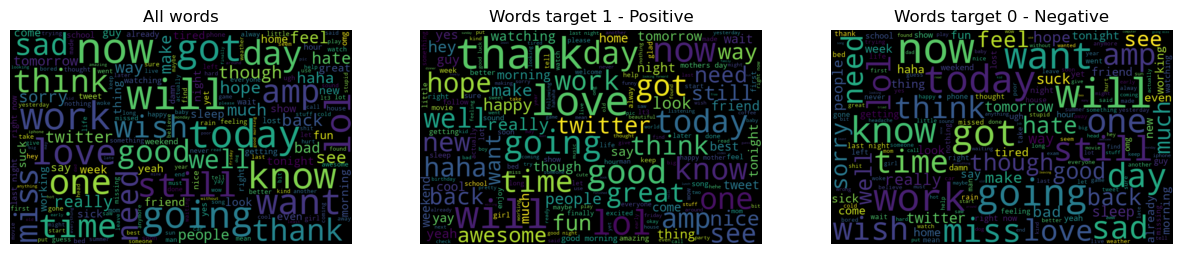

In [42]:
all_words = ' '.join([text for text in data['clean_text']])
all_words_pos = ' '.join([text for text in data['clean_text'][data['Target'] == 1]])
all_words_neg = ' '.join([text for text in data['clean_text'][data['Target'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
wordcloud_pos = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_pos)
wordcloud_neg = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_neg)

# plot the graph

fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(wordcloud, interpolation="bilinear")
ax[0].set_title('All words')
ax[0].axis('off')
ax[1].imshow(wordcloud_pos, interpolation="bilinear")
ax[1].set_title('Words target 1 - Positive')
ax[1].axis('off')
ax[2].imshow(wordcloud_neg, interpolation="bilinear")
ax[2].set_title('Words target 0 - Negative')
ax[2].axis('off')
fig.show()

In [43]:
def hashtag_extract(tweetss):
    hashtags = []
    for tweet in tweetss:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [44]:
# extracting hashtags from positive tweets
ht_positive = hashtag_extract(df['Text'][data['Target'] == 1])

# extracting hashtags from negative tweets
ht_negative = hashtag_extract(df['Text'][data['Target'] == 0])

In [45]:
# unnest list 
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [46]:
ht_positive[:5]

['tek09', 'innovatechurch', 'yaymen', 'TwitterTakeover', 'Win7']

In [47]:
ht_negative[:5]

['aquarium', '1', 'dontyouhate', 'deli', 'Conwy']

In [48]:
# converting dictionary to dataframe
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()), 
                  'Count': list(freq.values())
                  })
d.sort_values(by='Count', ascending=False)

,Hashtag,Count
13,followfriday,176
38,FollowFriday,42
7,fb,38
27,asot400,35
19,hoppusday,27
...,...,...
340,terminator,1
341,sarahconnor,1
342,tscc,1
344,dbnerd,1


Text(0.5, 1.0, 'Top 10 most frequent hashtags in positive tweets')

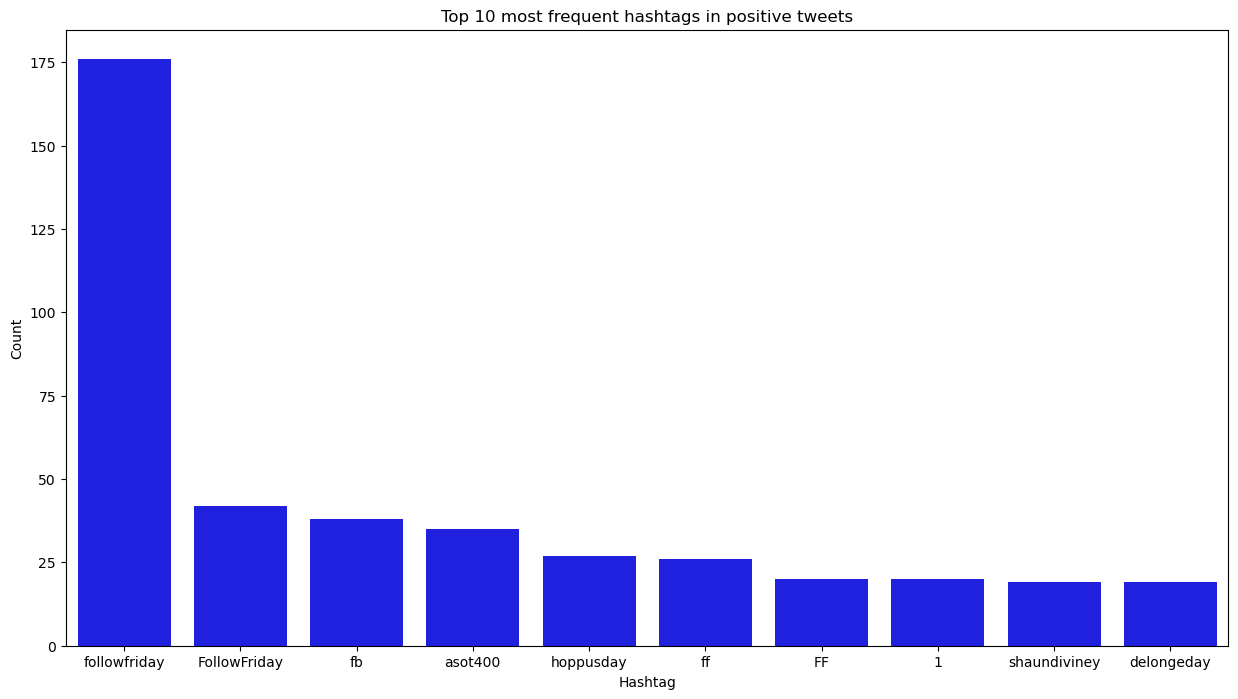

In [49]:
# selecting top 10 most frequent hashtags positive
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(15,8))
sns.barplot(data=d, x= "Hashtag", y = "Count", color="blue")
plt.title('Top 10 most frequent hashtags in positive tweets')

In [50]:
# converting dictionary to dataframe
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()), 
                  'Count': list(freq.values())
                  })
d.sort_values(by='Count', ascending=False)

,Hashtag,Count
13,fb,215
6,squarespace,116
28,iranelection,64
53,fail,48
178,BSB,41
...,...,...
812,bcp3,1
811,GetWellSoonJB,1
810,macbooks,1
809,imacs,1


Text(0.5, 1.0, 'Top 10 most frequent hashtags in negative tweets')

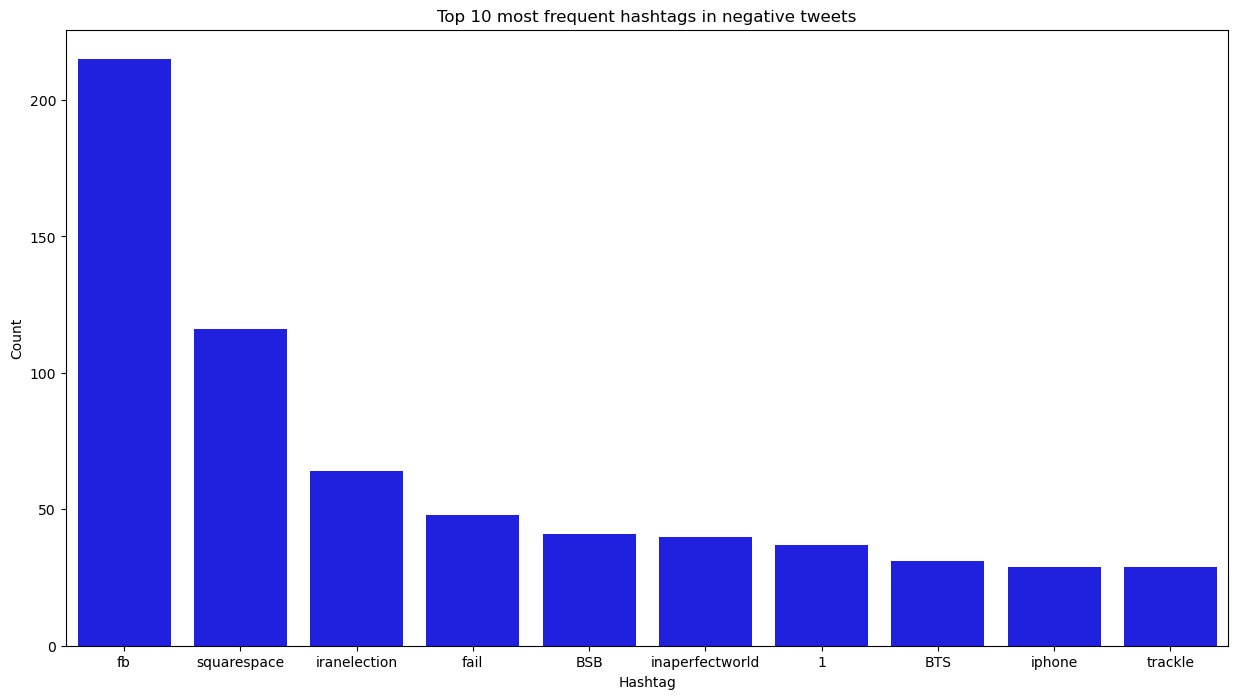

In [51]:
# selecting top 10 most frequent hashtags negative
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(15,8))
sns.barplot(data=d, x= "Hashtag", y = "Count", color="blue")
plt.title('Top 10 most frequent hashtags in negative tweets')

## **2. Feature engineering** 

In [117]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# text processing libraries
import re
import contractions

from collections import Counter
# import string
import nltk
# import warnings
# %matplotlib inline
# warnings.filterwarnings("ignore")
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\macie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\macie\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [90]:
# reading splited data
x_train = pd.read_csv("..//data//x_train.csv", encoding="latin-1")
y_train = pd.read_csv("..//data//y_train.csv", encoding="latin-1")
x_test = pd.read_csv("..//data//x_test.csv", encoding="latin-1")
y_test = pd.read_csv("..//data//y_test.csv", encoding="latin-1")
x_valid = pd.read_csv("..//data//x_valid.csv", encoding="latin-1")
y_valid = pd.read_csv("..//data//y_valid.csv", encoding="latin-1")

In [91]:
# for building team
df_x = x_valid
df_y = y_valid

In [92]:
# for validation team
# df_x = x_test
# df_y = y_test

In [104]:
#changing 4 into 1
df_y = df_y.replace(4, 1)
y_train = y_train.replace(4, 1)

In [93]:
def clear_data(x): 
   # removing unnecessary columns
   data_frame = x.drop(['ID', 'Date', 'flag', 'User'], axis = 'columns')

   # removing unnecessary user tags
   data_frame['Text'] = data_frame['Text'].replace(r"@\w+", "", regex=True)

   # resolving contractions (and slang)
   #data_frame['Text'] = data_frame['Text'].apply(lambda x: contractions.fix(x))

   # removing punctuation marks
   data_frame['Text'] = data_frame['Text'].apply(lambda x: re.sub(r'[^\?\!\w\s]', '', x))

   # deleting websites
   data_frame['Text'] = data_frame['Text'].apply(lambda x: re.sub(r'http\S+', '', x))

   # lowercasing letters in the text
   #data_frame['Text'] = data_frame['Text'].str.lower()

   # removing words with less than 3 characters
   data_frame['Text'] = data_frame['Text'].apply(lambda x: " ".join([w for w in x.split() if len(w) >= 2]))

   return data_frame

In [94]:
# preparing data for the model 
x_train = clear_data(x_train)

In [95]:
# preparing data for the model validation
df_x = clear_data(df_x)

In [96]:
# lemmatization
def lemmatization(x):
    data_frame = x
    # individual words considered as tokens
    tokenized_tweet = data_frame['Text'].apply(lambda x: x.split())

    # Initialize wordnet lemmatizer 
    wnl = WordNetLemmatizer()
    tokenized_tweet = tokenized_tweet.apply(lambda s: [wnl.lemmatize(word, pos='v') for word in s])
    tokenized_tweet = tokenized_tweet.apply(lambda s: [wnl.lemmatize(word, pos='n') for word in s])
    tokenized_tweet = tokenized_tweet.apply(lambda s: [wnl.lemmatize(word, pos='a') for word in s])
    tokenized_tweet = tokenized_tweet.apply(lambda s: [wnl.lemmatize(word, pos='r') for word in s])

    # combining to sentences
    combined_sentences = [' '.join(tokens) for tokens in tokenized_tweet]
    data_frame['combined_tweet'] = combined_sentences
    return data_frame

In [97]:
# lemmatization data for the model
x_train = lemmatization(x_train)

In [98]:
# lemmitization data for the model validation
df_x = lemmatization(df_x)

In [99]:
# selecting stop words to be removed
custom_stop_words = CountVectorizer(stop_words='english').get_stop_words()
custom_stop_words = set(custom_stop_words) - {'not','alone','why','well','very','together','such','nobody','noone','nothing','myself','cry','cannot','cant','can','could','couldnt'}
custom_stop_words = list(custom_stop_words)
custom_stop_words


['elsewhere',
 'ie',
 'describe',
 'thereupon',
 'somehow',
 'de',
 'mill',
 'otherwise',
 'amoungst',
 'move',
 'where',
 'also',
 'several',
 'yourselves',
 'fire',
 'beyond',
 'put',
 'our',
 'he',
 'mostly',
 'eleven',
 'bottom',
 'here',
 'if',
 'each',
 're',
 'both',
 'give',
 'forty',
 'interest',
 'moreover',
 'sixty',
 'sometime',
 'other',
 'front',
 'himself',
 'whom',
 'over',
 'hereby',
 'everywhere',
 'are',
 'towards',
 'these',
 'everything',
 'few',
 'else',
 'hereafter',
 'show',
 'have',
 'least',
 'been',
 'much',
 'is',
 'you',
 'mine',
 'amount',
 'seemed',
 'into',
 'call',
 'part',
 'twelve',
 'still',
 'whereupon',
 'along',
 'latter',
 'she',
 'becomes',
 'nine',
 'any',
 'one',
 'my',
 'anyone',
 'neither',
 'whereas',
 'indeed',
 'when',
 'becoming',
 'him',
 'someone',
 'we',
 'formerly',
 'thus',
 'below',
 'sincere',
 'none',
 'beforehand',
 'yet',
 'go',
 'once',
 'always',
 'become',
 'six',
 'everyone',
 'who',
 'hundred',
 'side',
 'so',
 'will',
 't

### Bag of words model  

In [106]:
# bag of words conditions and vectorization
bow_vectorizer = CountVectorizer(max_df = 0.95, min_df = 5, max_features = 13000, stop_words=custom_stop_words)
bow = bow_vectorizer.fit_transform(x_train['combined_tweet'])
# vectorization of the validation data
bow2 = bow_vectorizer.transform(df_x['combined_tweet'])

In [107]:
def print_score(y_test, y_pred):
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    gini = 2 * auc - 1
    print("F1 score: ", f1, "\nAccuracy: ", acc, "\nAUC: ", auc, "\nGini: ", gini)
    print(classification_report(y_test,y_pred))
    

In [119]:
def train_test_lr(x_train, y_train, x_test, y_test):
    # Logistic Regression
    print("\n##########   Logistic Regression   ##########\n")
    model = LogisticRegression(max_iter=13000)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print_score(y_test, y_pred)

In [120]:

def train_test_KNeighborsClassifier(x_train, y_train, x_test, y_test):
    # KNeighborsClassifier
    print("\n##########   KNeighborsClassifier   ##########\n")
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print_score(y_test, y_pred)

In [121]:
def train_test_RandomForestClassifier(x_train, y_train, x_test, y_test):
    # RandomForestClassifier
    print("\n##########   RandomForestClassifier   ##########\n")
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print_score(y_test, y_pred)

In [122]:

def train_test_DecisionTreeClasifier(x_train, y_train, x_test, y_test):
    # DecisionTreeClasifier
    print("\n##########   DecisionTreeClasifier   ##########\n")
    model = DecisionTreeClasifier(random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print_score(y_test, y_pred)

In [123]:
def train_test_MLPClassifier(x_train, y_train, x_test, y_test):
    # MLPClassifier
    print("\n##########   MLPClassifier   ##########\n")
    model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print_score(y_test, y_pred)

In [116]:
train_test_lr(bow, y_train, bow2, df_y)
#train_test_KNeighborsClassifier(bow, y_train, bow2, df_y) #długo mieli

##########   Logistic Regression   ##########



c:\Users\macie\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 score:  0.5709492456364117 
Accuracy:  0.8304321960390734 
AUC:  0.7081722510767389 
Gini:  0.41634450215347774
              precision    recall  f1-score   support

           0       0.85      0.94      0.89    167952
           1       0.71      0.48      0.57     52249

    accuracy                           0.83    220201
   macro avg       0.78      0.71      0.73    220201
weighted avg       0.82      0.83      0.82    220201

##########   KNeighborsClassifier   ##########



c:\Users\macie\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KeyboardInterrupt: 

In [124]:
train_test_RandomForestClassifier(bow, y_train, bow2, df_y)


##########   RandomForestClassifier   ##########



C:\Users\macie\AppData\Local\Temp\ipykernel_19884\2861202898.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


In [ ]:
train_test_DecisionTreeClasifier(bow, y_train, bow2, df_y)

In [ ]:
train_test_MLPClassifier(bow, y_train, bow2, df_y)

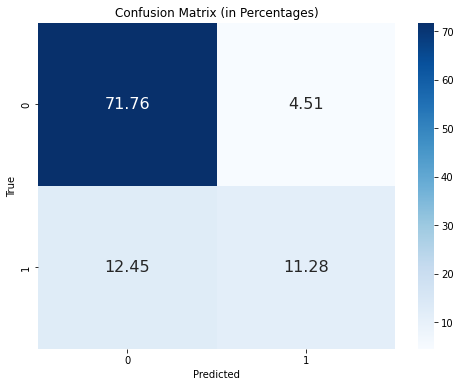

In [54]:
# plotting the confusion matrix
cm = confusion_matrix(df_y, pred)

# Calculate the total number of samples
total_samples = np.sum(cm)

# Convert the values in the confusion matrix to percentages
cm_percent = (cm / total_samples) * 100

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (in Percentages)')
plt.show()


### Tensorflow model

In [55]:
# read the CSV file
x_train = pd.read_csv('../data/x_train.csv')
x_valid = pd.read_csv('../data/x_valid.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_valid = pd.read_csv('../data/y_valid.csv')
x_test = pd.read_csv("..//data//x_test.csv")
y_test = pd.read_csv("..//data//y_test.csv")

In [56]:
# for building team
df_x = x_valid
df_y = y_valid

In [57]:
# for validation team
# df_x = x_test
# df_y = y_test

In [58]:
# replacing 4 with 1 in the target column to make it binary
y_train['Target'] = y_train['Target'].replace(4, 1)
df_y['Target'] = df_y['Target'].replace(4, 1)

In [59]:
# making training and testing sentences
training_sentences = x_train['Text'].tolist()
testing_sentences = df_x['Text'].tolist()

In [60]:
# making training and testing labels
training_labels = y_train['Target'].tolist()
testing_labels = df_y['Target'].tolist()

In [61]:
# some necessary variables
vocab_size = 10000
oov_tok = "<OOV>"
max_length = 80
embedding_dim = 16

In [62]:
# changing the sentences into sequences
tokenizer = Tokenizer(num_words=vocab_size, 
                      oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_length, 
                                padding = 'post',
                                truncating = 'post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, 
                                maxlen = max_length,
                                padding = 'post',
                                truncating = 'post')

In [63]:
# changing the lists into arrays for the model
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [64]:
# creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
# model.summary()

In [66]:
# number of epochs to train the model
num_epochs = 2

In [67]:
# training and testing the model
history = model.fit(training_padded, 
                    training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, 
                                     testing_labels), 
                    verbose=2)

Epoch 1/2


16057/16057 - 18s - loss: 0.3830 - accuracy: 0.8345 - val_loss: 0.3498 - val_accuracy: 0.8503 - 18s/epoch - 1ms/step
Epoch 2/2
16057/16057 - 17s - loss: 0.3438 - accuracy: 0.8532 - val_loss: 0.3461 - val_accuracy: 0.8507 - 17s/epoch - 1ms/step


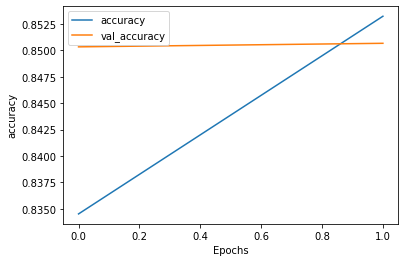

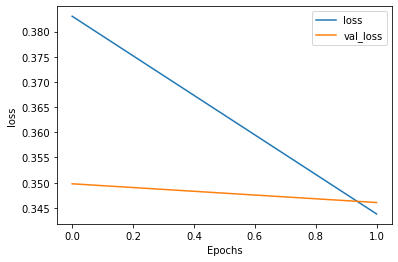

In [68]:
# plotting the accuracy and loss
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [69]:
pred = model.predict(testing_padded)

6882/6882 [==============================] - 4s 534us/step


In [70]:
auc = roc_auc_score(testing_labels, pred)
gini = 2 * auc - 1
gini

0.7653842350734352